In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/pavansai/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the data

In [2]:
df = pd.read_csv('/Users/pavansai/desktop1/Python/EDA/csv/dataset_diabetes_diabetic_data (1).csv')

### Checking the data

In [3]:
df.head(7)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes
5,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,No,Yes
6,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,Ch,Yes


### Dropping unwanted variables

In [4]:
df.duplicated().sum()

0

In [5]:
df.duplicated('patient_nbr').sum()

17680

In [6]:
df.shape[0]

70180

In [7]:
df.shape[0]-df.duplicated('patient_nbr').sum()

52500

In [8]:
df['patient_nbr'].value_counts()

1660293      23
23199021     23
23643405     22
84428613     22
89472402     20
             ..
21355677      1
96588117      1
61555455      1
9540666       1
175429310     1
Name: patient_nbr, Length: 52500, dtype: int64

In [9]:
df.drop_duplicates('patient_nbr',keep='last',inplace=True)

In [10]:
df.shape[0]

52500

In [11]:
df = df.drop('patient_nbr',axis=1)

### checking the information of dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52500 entries, 0 to 70179
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      52500 non-null  object
 1   gender                    52500 non-null  object
 2   age                       52500 non-null  object
 3   admission_type_id         52500 non-null  int64 
 4   discharge_disposition_id  52500 non-null  int64 
 5   admission_source_id       52500 non-null  int64 
 6   time_in_hospital          52500 non-null  int64 
 7   num_lab_procedures        52500 non-null  int64 
 8   num_procedures            52500 non-null  int64 
 9   num_medications           52500 non-null  int64 
 10  number_outpatient         52500 non-null  int64 
 11  number_emergency          52500 non-null  int64 
 12  number_inpatient          52500 non-null  int64 
 13  diag_1                    52500 non-null  object
 14  diag_2                

In [13]:
df['gender'].value_counts(normalize=True)

Female             0.536667
Male               0.463295
Unknown/Invalid    0.000038
Name: gender, dtype: float64

In [14]:
df['admission_type_id'].value_counts()

1    26083
2    10221
3     9537
6     3716
5     2737
8      192
4        7
7        7
Name: admission_type_id, dtype: int64

### Checking descriptive stats of data

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
race,52500,6,Caucasian,38822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,52500,3,Female,28175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,52500,10,[70-80),13509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,52500.0,NaN,NaN,NaN,2.147238,1.547276,1.0,1.0,2.0,3.0,8.0
discharge_disposition_id,52500.0,NaN,NaN,NaN,3.799257,5.41455,1.0,1.0,1.0,4.0,28.0
admission_source_id,52500.0,NaN,NaN,NaN,5.813924,4.400001,1.0,1.0,7.0,7.0,20.0
time_in_hospital,52500.0,NaN,NaN,NaN,4.341752,3.015526,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,52500.0,NaN,NaN,NaN,42.996171,19.347772,1.0,31.0,44.0,56.0,129.0
num_procedures,52500.0,NaN,NaN,NaN,1.398152,1.713572,0.0,0.0,1.0,2.0,6.0
num_medications,52500.0,NaN,NaN,NaN,15.192629,8.201336,1.0,10.0,14.0,19.0,81.0


In [16]:
df['diabatic'].value_counts(normalize=True)*100

Yes    65.129524
No     34.870476
Name: diabatic, dtype: float64

#### Here the class is balanced

### Getting all value counts for nominal columns

In [17]:
for col in df[['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id','diag_1',
              'diag_2','diag_3','change','diabatic']]:
    print(col.upper(),':',df[col].nunique())
    print(df[col].value_counts().sort_values())
    print('\n')

RACE : 6
Asian                314
Other                718
Hispanic            1013
?                   1247
AfricanAmerican    10386
Caucasian          38822
Name: race, dtype: int64


GENDER : 3
Unknown/Invalid        2
Male               24323
Female             28175
Name: gender, dtype: int64


AGE : 10
[0-10)        149
[10-20)       432
[20-30)       820
[90-100)     1451
[30-40)      2018
[40-50)      5055
[80-90)      8489
[50-60)      9141
[60-70)     11436
[70-80)     13509
Name: age, dtype: int64


ADMISSION_TYPE_ID : 8
4        7
7        7
8      192
5     2737
6     3716
3     9537
2    10221
1    26083
Name: admission_type_id, dtype: int64


DISCHARGE_DISPOSITION_ID : 26
27        2
12        2
20        2
19        5
16        5
10        6
9         8
17       11
24       14
15       22
28       51
8        71
14      213
13      213
23      217
7       310
4       510
25      557
5       734
22      868
2      1134
11     1254
18     2385
6      5824
3      6263
1   

Race, diag1,diag2,diag3 has ? value

diag1,diag2,diag3 are categorical and have lot of values which is useless to us.

In [18]:
print("Before Removing: ", df.shape[1])
df.drop(['diag_1','diag_2','diag_3'],axis=1,inplace=True)
print("After Removing: ", df.shape[1])

Before Removing:  19
After Removing:  16


In [19]:
df.gender.replace('Unkown/Invalid',np.nan,inplace=True)
df.race.replace('?',np.nan,inplace=True)
df.dropna(inplace=True)

In [20]:
df.shape

(51253, 16)

In [21]:
df.duplicated().sum()

18

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'change', 'diabatic'],
      dtype='object')

<AxesSubplot:>

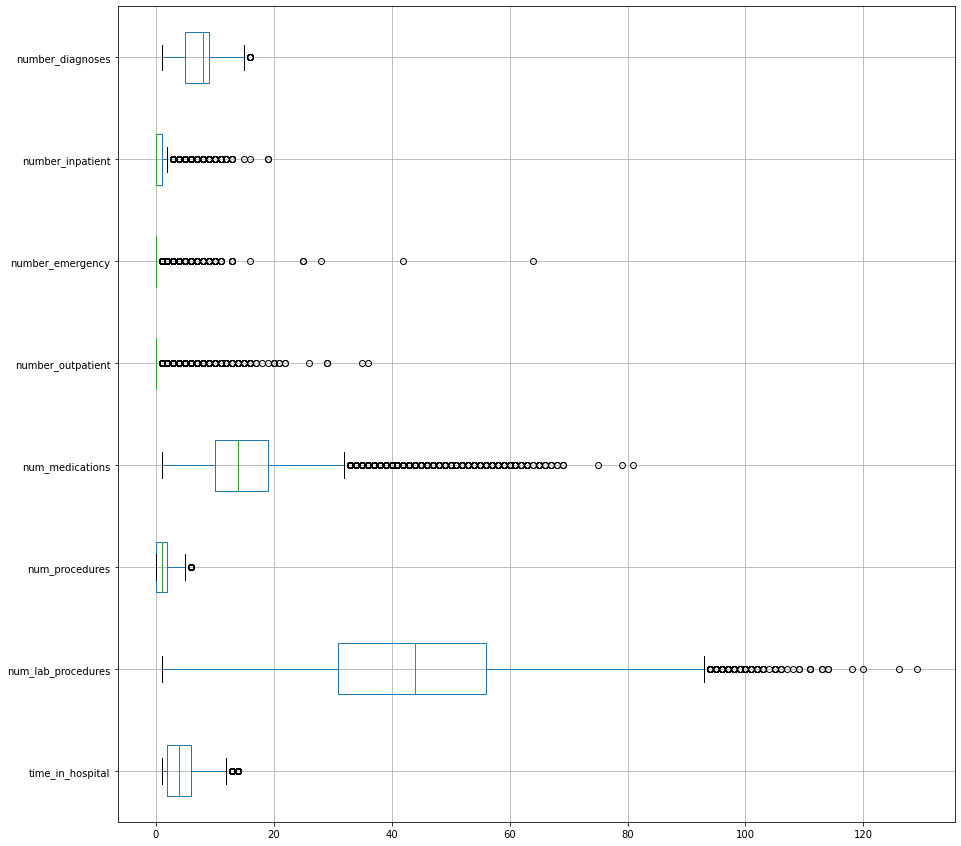

In [24]:
plt.figure(figsize=(15,15))
df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']].boxplot(vert=0)

In [25]:
def replace_outlier(col):
    Q1,Q3 = np.quantile(col,[.25,.75])
    IQR = Q3-Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL,UL    #UL- capping, LL-Flooring

In [26]:
df_num = df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]

In [27]:
for col in df_num.columns:
    LL, UL = replace_outlier(df[col])
    df_num[col] = np.where(df_num[col] > UL, UL,df_num[col])
    df_num[col] = np.where(df_num[col] < LL, LL,df_num[col])# winsorization - capping and flooring

/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_87719/801041607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = np.where(df_num[col] > UL, UL,df_num[col])
/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_87719/801041607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = np.where(df_num[col] < LL, LL,df_num[col])# winsorization - capping and flooring


<AxesSubplot:>

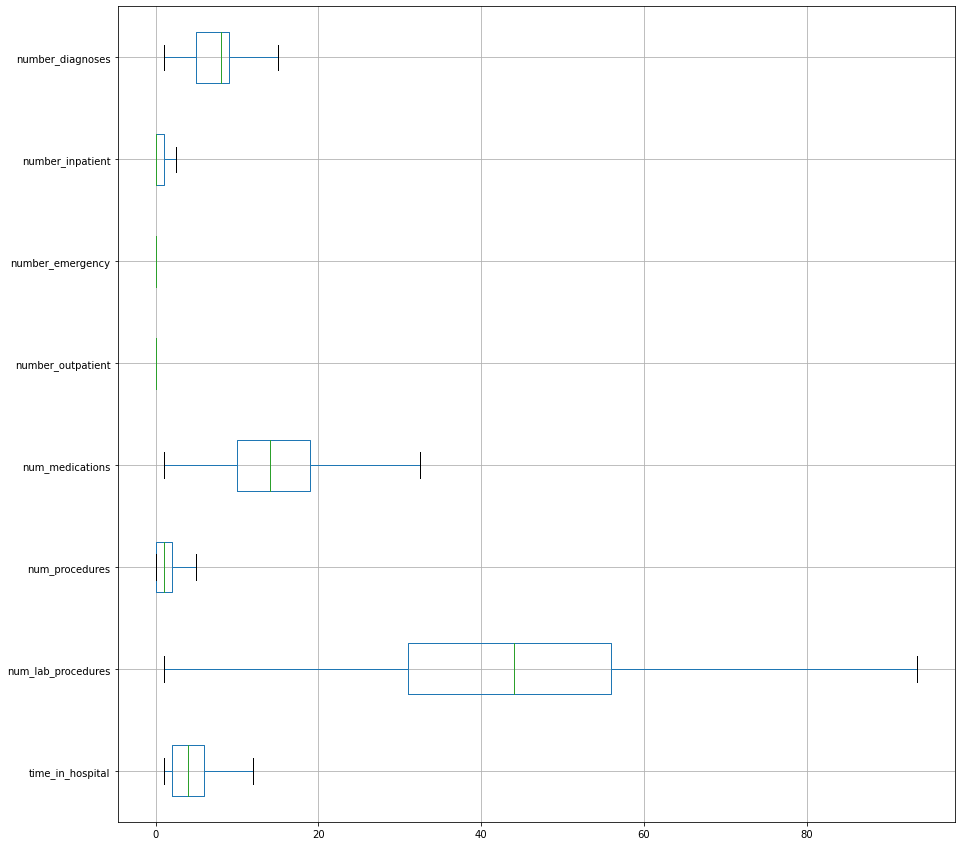

In [28]:
plt.figure(figsize=(15,15))
df_num.boxplot(vert=0)

### Checking Pairwise distribution of continuous variables

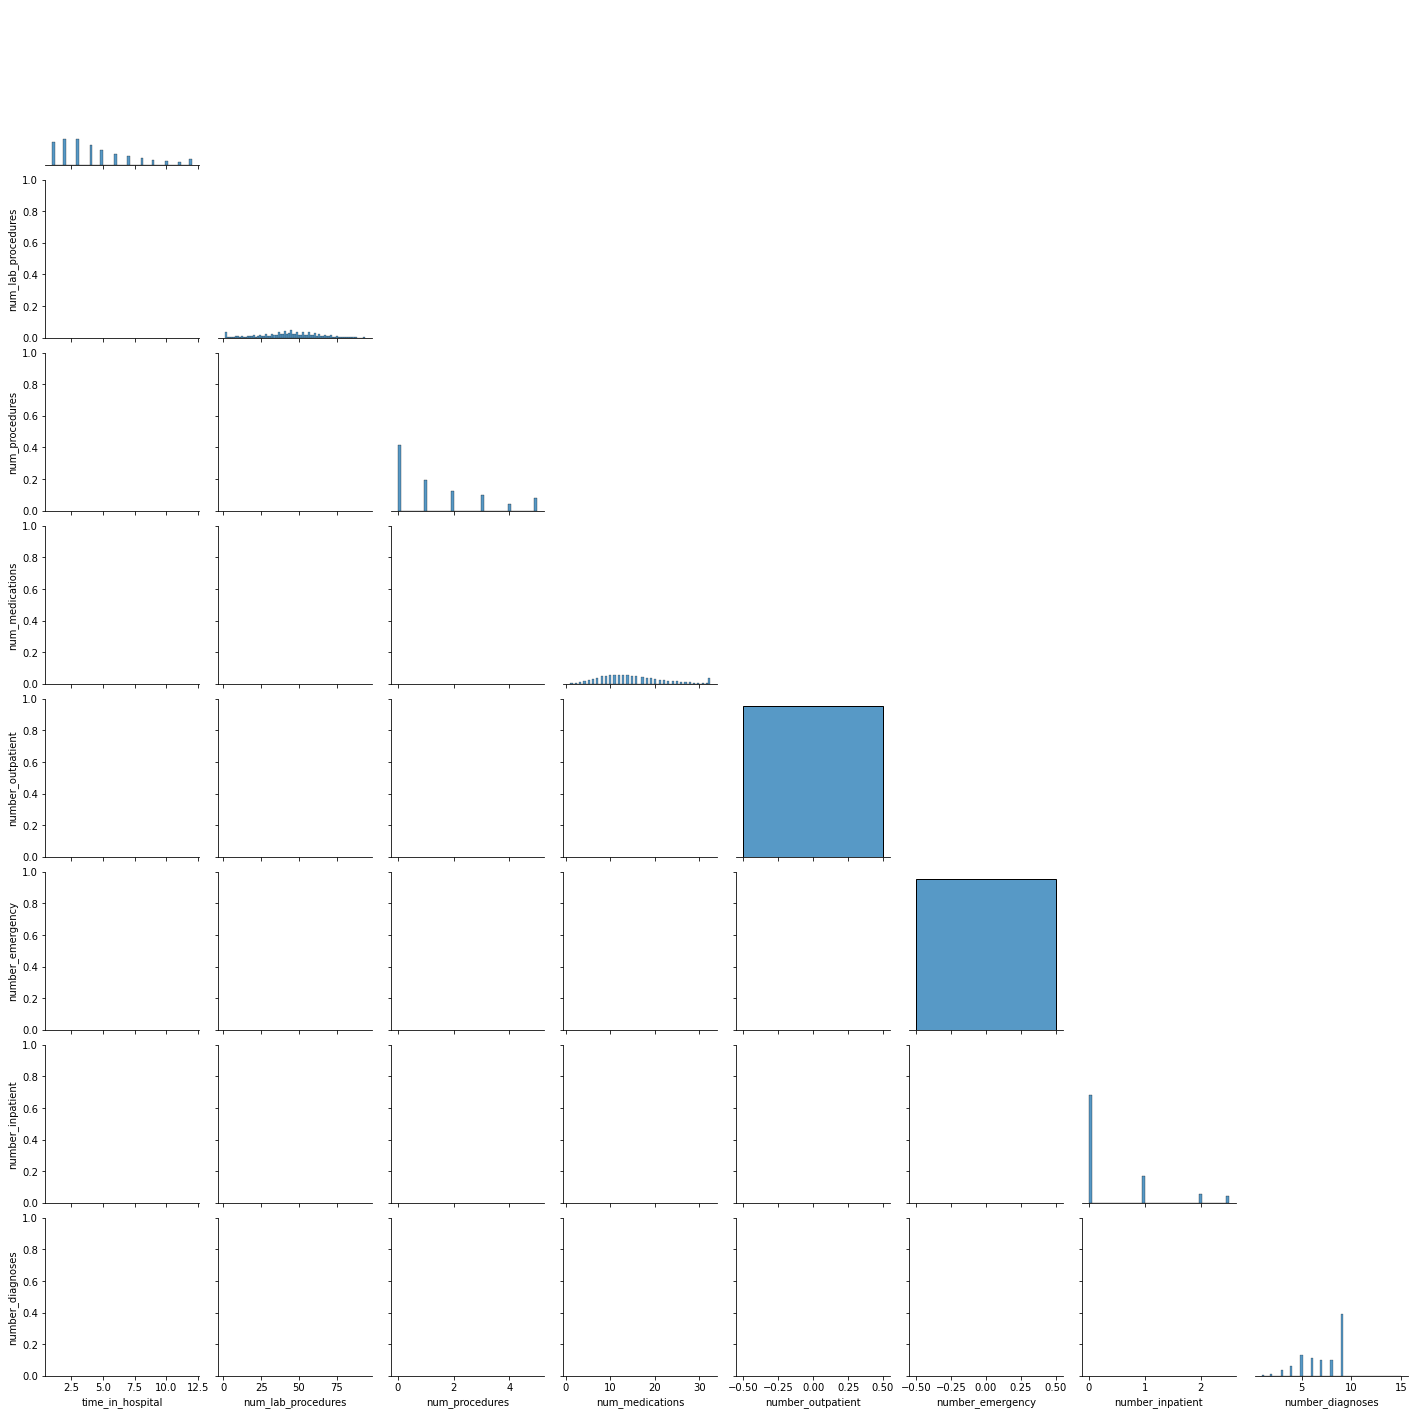

In [29]:
sns.pairplot(data=df_num,corner=True,kind='Scatter')

### Checking for correlations

<AxesSubplot:>

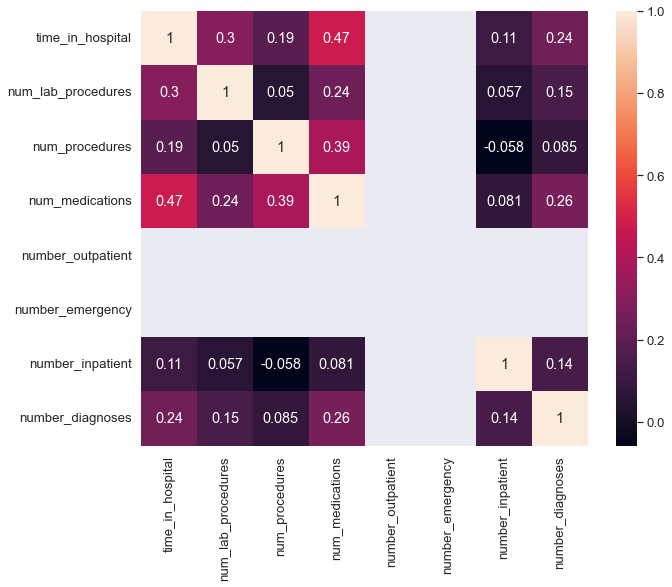

In [30]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df_num.corr(),annot=True)

In [31]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print("Feature: ",feature)
        print(pd.Categorical(df[feature].unique()))
        
        df[feature] = pd.Categorical(df[feature]).codes



Feature:  race
['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']


Feature:  gender
['Female', 'Male', 'Unknown/Invalid']
Categories (3, object): ['Female', 'Male', 'Unknown/Invalid']


Feature:  age
['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)', '[80-90)', '[90-100)']


Feature:  change
['No', 'Ch']
Categories (2, object): ['Ch', 'No']


Feature:  diabatic
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


In [32]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1,1,0
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9,0,1
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6,1,1
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7,0,1
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5,0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51235 entries, 0 to 70179
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      51235 non-null  int8 
 1   gender                    51235 non-null  int8 
 2   age                       51235 non-null  int8 
 3   admission_type_id         51235 non-null  int64
 4   discharge_disposition_id  51235 non-null  int64
 5   admission_source_id       51235 non-null  int64
 6   time_in_hospital          51235 non-null  int64
 7   num_lab_procedures        51235 non-null  int64
 8   num_procedures            51235 non-null  int64
 9   num_medications           51235 non-null  int64
 10  number_outpatient         51235 non-null  int64
 11  number_emergency          51235 non-null  int64
 12  number_inpatient          51235 non-null  int64
 13  number_diagnoses          51235 non-null  int64
 14  change                    51235 non-nu

In [34]:
df.diabatic.value_counts(normalize=True)*100

1    64.984874
0    35.015126
Name: diabatic, dtype: float64

there is no class imbalnce here

### Splitting into train and test

In [35]:
X = df.drop(['diabatic','change'],axis=1)

In [36]:
y = df['diabatic']
X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=40,stratify=y)

In [39]:
train_labels.value_counts(normalize=True)*100

1    64.984385
0    35.015615
Name: diabatic, dtype: float64

In [40]:
test_labels.value_counts(normalize=True)*100

1    64.986013
0    35.013987
Name: diabatic, dtype: float64

### Checking dimensions of test and train data


In [41]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("train_labels: ",train_labels.shape)
print("test_labels: ",test_labels.shape)

X_train:  (35864, 14)
X_test:  (15371, 14)
train_labels:  (35864,)
test_labels:  (15371,)


## Building Decision tree classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
param = {
    'max_depth' : [10,12],#[3,5,7,9
    'min_samples_split' : [200],#150-450
    'min_samples_leaf' : [250,300,750]
    
}
dtcl = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dtcl,param_grid=param,cv=10)#cv=3,8,10

In [44]:
grid.fit(X_train,train_labels)
print(grid.best_params_)
best_grid = grid.best_estimator_
best_grid

{'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=200)

### Checking Variable imprortance

In [45]:
print(pd.DataFrame(best_grid.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values("Imp",ascending=False))

                               Imp
num_medications           0.549850
number_diagnoses          0.190308
num_procedures            0.102373
admission_type_id         0.043860
age                       0.036145
num_lab_procedures        0.026182
admission_source_id       0.021629
gender                    0.010323
number_inpatient          0.006157
discharge_disposition_id  0.005101
race                      0.002904
time_in_hospital          0.002824
number_outpatient         0.002345
number_emergency          0.000000


In [46]:
y_trainPR = best_grid.predict(X_train)
y_trainPR[:5]

array([1, 1, 0, 1, 1], dtype=int8)

In [47]:
train_labels.head(5)

29560    1
51356    1
38456    1
48620    1
7762     1
Name: diabatic, dtype: int8

In [48]:
y_testPR = best_grid.predict(X_test)
y_testPR[:5]

array([0, 0, 0, 1, 0], dtype=int8)

In [49]:
test_labels.head(5)

47539    1
56282    0
4413     0
19398    1
67827    0
Name: diabatic, dtype: int8

In [50]:
ytest_predict_prob = best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.509091,0.490909
1,0.509091,0.490909
2,0.552870,0.447130
3,0.377163,0.622837
4,0.723140,0.276860


### Confusion matrix

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

Text(28.5, 0.5, 'Actual values')

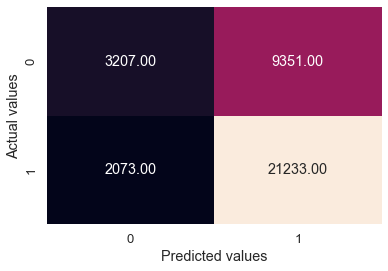

In [52]:
sns.heatmap(confusion_matrix(train_labels,y_trainPR),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [53]:
## Train data acc
cart_train_acc = best_grid.score(X_train,train_labels)
cart_train_acc

0.6814633058219942

In [54]:
print(classification_report(train_labels,y_trainPR))

              precision    recall  f1-score   support

           0       0.61      0.26      0.36     12558
           1       0.69      0.91      0.79     23306

    accuracy                           0.68     35864
   macro avg       0.65      0.58      0.57     35864
weighted avg       0.66      0.68      0.64     35864



In [55]:
cart_metrics = classification_report(train_labels,y_trainPR,output_dict=True)
df = pd.DataFrame(cart_metrics).transpose()
df

,precision,recall,f1-score,support
0,0.607386,0.255375,0.359569,12558.000000
1,0.694252,0.911053,0.788013,23306.000000
accuracy,0.681463,0.681463,0.681463,0.681463
macro avg,0.650819,0.583214,0.573791,35864.000000
weighted avg,0.663835,0.681463,0.637991,35864.000000


In [56]:
cart_train_precision = round(df.loc["1"][0],2)
cart_train_recall = round(df.loc["1"][1],2)
cart_train_f1 = round(df.loc["1"][2],2)
print("cart_train_precision: ",cart_train_precision)
print("cart_train_recall: ",cart_train_recall)
print("cart_train_f1: ",cart_train_f1)

cart_train_precision:  0.69
cart_train_recall:  0.91
cart_train_f1:  0.79


### Confusion Mtrix for test data

Text(28.5, 0.5, 'Actual values')

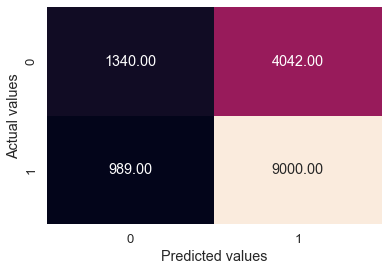

In [57]:
sns.heatmap(confusion_matrix(test_labels,y_testPR),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [58]:
## Train data acc
cart_test_acc = best_grid.score(X_test,test_labels)
cart_test_acc

0.672695335371804

In [59]:
print(classification_report(test_labels,y_testPR))

              precision    recall  f1-score   support

           0       0.58      0.25      0.35      5382
           1       0.69      0.90      0.78      9989

    accuracy                           0.67     15371
   macro avg       0.63      0.57      0.56     15371
weighted avg       0.65      0.67      0.63     15371



In [60]:
cart_metrics = classification_report(test_labels,y_testPR,output_dict=True)
df1 = pd.DataFrame(cart_metrics).transpose()
df1

,precision,recall,f1-score,support
0,0.575354,0.248978,0.347555,5382.000000
1,0.690078,0.900991,0.781555,9989.000000
accuracy,0.672695,0.672695,0.672695,0.672695
macro avg,0.632716,0.574985,0.564555,15371.000000
weighted avg,0.649909,0.672695,0.629595,15371.000000


In [61]:
cart_test_precision = round(df1.loc["1"][0],2)
cart_test_recall = round(df1.loc["1"][1],2)
cart_test_f1 = round(df1.loc["1"][2],2)
print("cart_test_precision: ",cart_test_precision)
print("cart_test_recall: ",cart_test_recall)
print("cart_test_f1: ",cart_test_f1)

cart_test_precision:  0.69
cart_test_recall:  0.9
cart_test_f1:  0.78


## Building a Random Forest Classifier

### Grid search for finding out optimal values for hyper parameters

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
param_grid = {
    'max_depth' : [10],#[3,5,7,9
    'max_features' : [5],
    'min_samples_split' : [750],#150-450
    'min_samples_leaf' : [250],
    'n_estimators' : [100]   
}
rfcl = RandomForestClassifier()
grid = GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=10)

In [64]:
grid.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'max_features': [5],
                         'min_samples_leaf': [250], 'min_samples_split': [750],
                         'n_estimators': [100]})

In [65]:
grid.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 250,
 'min_samples_split': 750,
 'n_estimators': 100}

In [66]:
best_grid = grid.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=250,
                       min_samples_split=750)

### Predicting train and test data

In [67]:
ytrain_pr = best_grid.predict(X_train)
ytrain_pr[:5]

array([1, 1, 0, 1, 1], dtype=int8)

In [68]:
train_labels.head(5)

29560    1
51356    1
38456    1
48620    1
7762     1
Name: diabatic, dtype: int8

In [69]:
ytest_pr = best_grid.predict(X_test)
ytest_pr[:5]

array([1, 1, 0, 1, 0], dtype=int8)

In [70]:
test_labels.head(5)

47539    1
56282    0
4413     0
19398    1
67827    0
Name: diabatic, dtype: int8

### RF model Performance evaluation training and testing data

Text(28.5, 0.5, 'Actual values')

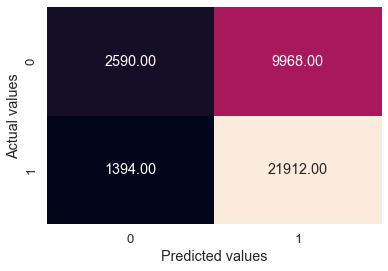

In [71]:
sns.heatmap(confusion_matrix(train_labels,ytrain_pr),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [72]:
## Train data acc
rf_train_acc = best_grid.score(X_train,train_labels)
rf_train_acc

0.6831920588891367

In [73]:
print(classification_report(train_labels,ytrain_pr))

              precision    recall  f1-score   support

           0       0.65      0.21      0.31     12558
           1       0.69      0.94      0.79     23306

    accuracy                           0.68     35864
   macro avg       0.67      0.57      0.55     35864
weighted avg       0.67      0.68      0.63     35864



In [74]:
rf_metrics = classification_report(train_labels,ytrain_pr,output_dict=True)
df = pd.DataFrame(rf_metrics).transpose()
df

,precision,recall,f1-score,support
0,0.650100,0.206243,0.313142,12558.000000
1,0.687327,0.940187,0.794114,23306.000000
accuracy,0.683192,0.683192,0.683192,0.683192
macro avg,0.668714,0.573215,0.553628,35864.000000
weighted avg,0.674292,0.683192,0.625699,35864.000000


In [75]:
rf_train_precision = round(df.loc["1"][0],2)
rf_train_recall = round(df.loc["1"][1],2)
rf_train_f1 = round(df.loc["1"][2],2)
print("rf_train_precision: ",rf_train_precision)
print("rf_train_recall: ",rf_train_recall)
print("rf_train_f1: ",rf_train_f1)

rf_train_precision:  0.69
rf_train_recall:  0.94
rf_train_f1:  0.79


### For test data

Text(28.5, 0.5, 'Actual values')

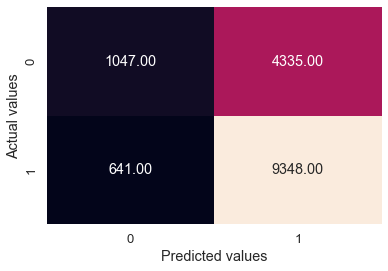

In [76]:
sns.heatmap(confusion_matrix(test_labels,ytest_pr),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [77]:
## Train data acc
rf_test_acc = best_grid.score(X_test,test_labels)
rf_test_acc

0.6762735020493137

In [78]:
print(classification_report(test_labels,ytest_pr))

              precision    recall  f1-score   support

           0       0.62      0.19      0.30      5382
           1       0.68      0.94      0.79      9989

    accuracy                           0.68     15371
   macro avg       0.65      0.57      0.54     15371
weighted avg       0.66      0.68      0.62     15371



In [79]:
rf_metrics = classification_report(test_labels,ytest_pr,output_dict=True)
df = pd.DataFrame(rf_metrics).transpose()
df

,precision,recall,f1-score,support
0,0.620261,0.194537,0.296181,5382.000000
1,0.683184,0.935829,0.789794,9989.000000
accuracy,0.676274,0.676274,0.676274,0.676274
macro avg,0.651722,0.565183,0.542987,15371.000000
weighted avg,0.661152,0.676274,0.616960,15371.000000


In [80]:
rf_test_precision = round(df.loc["1"][0],2)
rf_test_recall = round(df.loc["1"][1],2)
rf_test_f1 = round(df.loc["1"][2],2)
print("rf_test_precision: ",rf_test_precision)
print("rf_test_recall: ",rf_test_recall)
print("rf_test_f1: ",rf_test_f1)

rf_test_precision:  0.68
rf_test_recall:  0.94
rf_test_f1:  0.79


In [81]:
print(pd.DataFrame(best_grid.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values("Imp",ascending=False))

                               Imp
num_medications           0.546677
number_diagnoses          0.146466
time_in_hospital          0.073682
num_procedures            0.059912
age                       0.041143
admission_type_id         0.033107
admission_source_id       0.032478
num_lab_procedures        0.027777
race                      0.014668
discharge_disposition_id  0.011093
number_inpatient          0.006536
gender                    0.004240
number_outpatient         0.002113
number_emergency          0.000108


In [82]:
#roc

# Building a neural network classifier

### Scaling data to mean (0-1)

In [83]:
# Scaling must be done for neural networks
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [84]:
sc = StandardScaler()

In [85]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [86]:
param = {
    'hidden_layer_sizes' : [32],#[32,64,128]
    'max_iter' : [200],
    'solver' : ['adam']#sdg
}
nncl = MLPClassifier(early_stopping=True,tol=0.01)
grid = GridSearchCV(estimator=nncl,param_grid=param,cv=10)

In [87]:
grid.fit(X_train_scaled,train_labels)
grid.best_params_

{'hidden_layer_sizes': 32, 'max_iter': 200, 'solver': 'adam'}

In [88]:
best_grid = grid.best_estimator_
best_grid

MLPClassifier(early_stopping=True, hidden_layer_sizes=32, tol=0.01)

### Predicting data

In [89]:
y_train_pr_nncl = best_grid.predict(X_train_scaled)
y_train_pr_nncl[:5]

array([1, 1, 0, 1, 1], dtype=int8)

In [90]:
train_labels.head()

29560    1
51356    1
38456    1
48620    1
7762     1
Name: diabatic, dtype: int8

In [91]:
y_test_pr_nncl = best_grid.predict(X_test_scaled)
y_test_pr_nncl[:5]

array([0, 1, 0, 1, 0], dtype=int8)

In [92]:
test_labels.head()

47539    1
56282    0
4413     0
19398    1
67827    0
Name: diabatic, dtype: int8

### NN model performance evaluation on training data

Text(28.5, 0.5, 'Actual Values')

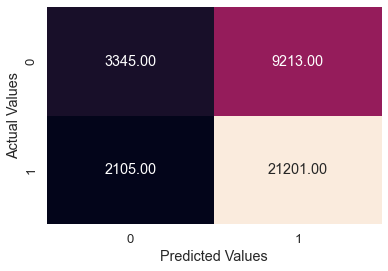

In [93]:
sns.heatmap(confusion_matrix(train_labels,y_train_pr_nncl),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [94]:
## Train data acc
nn_train_acc = best_grid.score(X_train_scaled,train_labels)
nn_train_acc

0.6844189159045282

In [95]:
print(classification_report(train_labels,y_train_pr_nncl))

              precision    recall  f1-score   support

           0       0.61      0.27      0.37     12558
           1       0.70      0.91      0.79     23306

    accuracy                           0.68     35864
   macro avg       0.66      0.59      0.58     35864
weighted avg       0.67      0.68      0.64     35864



In [96]:
nn_metrics = classification_report(train_labels,y_train_pr_nncl,output_dict=True)
df = pd.DataFrame(nn_metrics).transpose()
df

,precision,recall,f1-score,support
0,0.613761,0.266364,0.371502,12558.000000
1,0.697080,0.909680,0.789315,23306.000000
accuracy,0.684419,0.684419,0.684419,0.684419
macro avg,0.655421,0.588022,0.580408,35864.000000
weighted avg,0.667906,0.684419,0.643015,35864.000000


In [97]:
nn_train_precision = round(df.loc["1"][0],2)
nn_train_recall = round(df.loc["1"][1],2)
nn_train_f1 = round(df.loc["1"][2],2)
print("rf_train_precision: ",nn_train_precision)
print("rf_train_recall: ",nn_train_recall)
print("rf_train_f1: ",nn_train_f1)

rf_train_precision:  0.7
rf_train_recall:  0.91
rf_train_f1:  0.79


### for test data

Text(28.5, 0.5, 'Actual values')

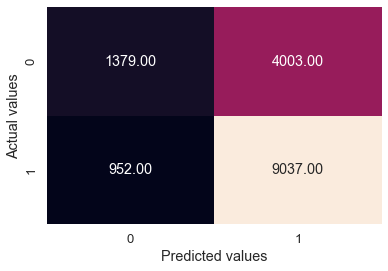

In [98]:
sns.heatmap(confusion_matrix(test_labels,y_test_pr_nncl),annot=True,cbar=False,fmt='.2f')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [99]:
## Train data acc
nn_test_acc = best_grid.score(X_test_scaled,test_labels)
nn_test_acc

0.6776397111443627

In [100]:
print(classification_report(test_labels,y_test_pr_nncl))

              precision    recall  f1-score   support

           0       0.59      0.26      0.36      5382
           1       0.69      0.90      0.78      9989

    accuracy                           0.68     15371
   macro avg       0.64      0.58      0.57     15371
weighted avg       0.66      0.68      0.64     15371



In [101]:
nn_metrics = classification_report(test_labels,y_test_pr_nncl,output_dict=True)
df = pd.DataFrame(nn_metrics).transpose()
df

,precision,recall,f1-score,support
0,0.591592,0.256224,0.357578,5382.00000
1,0.693021,0.904695,0.784837,9989.00000
accuracy,0.677640,0.677640,0.677640,0.67764
macro avg,0.642307,0.580460,0.571207,15371.00000
weighted avg,0.657507,0.677640,0.635236,15371.00000


In [102]:
nn_test_precision = round(df.loc["1"][0],2)
nn_test_recall = round(df.loc["1"][1],2)
nn_test_f1 = round(df.loc["1"][2],2)
print("rf_test_precision: ",nn_test_precision)
print("rf_test_recall: ''",nn_test_recall)
print("rf_test_f1: ",nn_test_f1)

rf_test_precision:  0.69
rf_test_recall: '' 0.9
rf_test_f1:  0.78


# Final Conclusion

## Comparison of performance metrics from 3 models

In [103]:
Index = ['Accuracy','AUC','Recall','Precision','F1 score']
data = pd.DataFrame({'CART Train' : [cart_train_acc,np.nan,cart_train_recall,cart_train_precision,cart_train_f1],
    'CART Test' : [cart_test_acc,np.nan,cart_test_recall,cart_test_precision,cart_test_f1],
    'RF Train' : [rf_train_acc,np.nan,rf_train_recall,rf_train_precision,rf_train_f1],
    'RF Test' : [rf_test_acc,np.nan,rf_test_recall,rf_test_precision,rf_test_f1],
    'NEURAL Train' : [nn_train_acc,np.nan,nn_train_recall,nn_train_precision,nn_train_f1],
    'NEURAL Test' : [nn_test_acc,np.nan,nn_test_recall,nn_test_precision,nn_test_f1]
},index=Index)

In [104]:
round(data,2)

,CART Train,CART Test,RF Train,RF Test,NEURAL Train,NEURAL Test
Accuracy,0.68,0.67,0.68,0.68,0.68,0.68
AUC,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.91,0.90,0.94,0.94,0.91,0.90
Precision,0.69,0.69,0.69,0.68,0.70,0.69
F1 score,0.79,0.78,0.79,0.79,0.79,0.78
